<a href="https://www.kaggle.com/code/laxmivatsalyadaita/gdp-africa?scriptVersionId=140082573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**If you like my notebook, please don't forget to UPVOTE! You can also make a copy of my notebook to run your additional analysis.** 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-and-gdp-africa/Data_Africa.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
raw_data = pd.read_csv('/kaggle/input/population-and-gdp-africa/Data_Africa.csv')

In [4]:
raw_data.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [5]:
data = raw_data.copy()

In [6]:
data['Country'].unique()

array(['Uganda', 'Burundi', 'Djibouti', 'Zambia', 'Zimbabwe', 'Kenya',
       'Union of the Comors', 'Mauritius', 'Madagascar', 'Mayotte',
       'Malawi', 'Mozambique', 'Reunion', 'Rwanda', 'Seyshelles',
       'Somalia', 'Tanzania', 'Eritrea', 'Ethiopia', 'South Sudan',
       'Sudan', 'Algeria', 'Egypt', 'SADR', 'Libya', 'Morocco', 'Tunisia',
       'Botswana', 'Lesotho', 'Namibia', 'Eswatini', 'South Africa',
       'Angola', 'Gabon', 'Cameroon', 'Democratic Republic of the Congo',
       'Republic of the Congo', 'Sao Tome and Principe',
       'Central African Republic', 'Chad', 'Equatorial Guinea', 'Benin',
       'Burkina Faso', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Cape Verde', 'Ivory Coast', 'Liberia', 'Mauritania', 'Mali',
       'Niger', 'Nigeria', 'Saint Helena, Ascension and Tristan da Cunha',
       'Senegal', 'Sierra Leone', 'Togo'], dtype=object)

In [7]:
data['Continent'].unique()

array(['East Africa', 'North Africa', 'South Africa', 'Central Africa',
       'West Africa'], dtype=object)

In [8]:
data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [9]:
data.isnull().sum()

ID               0
Year             0
Country          0
Continent        0
Population       0
GDP (USD)      155
dtype: int64

In [10]:
data['GDP (USD)'] = data['GDP (USD)'].fillna(data.groupby('Continent')['GDP (USD)'].transform('mean'))

In [11]:
data.isnull().sum()

ID             0
Year           0
Country        0
Continent      0
Population     0
GDP (USD)      0
dtype: int64

<Axes: xlabel='Year', ylabel='GDP (USD)'>

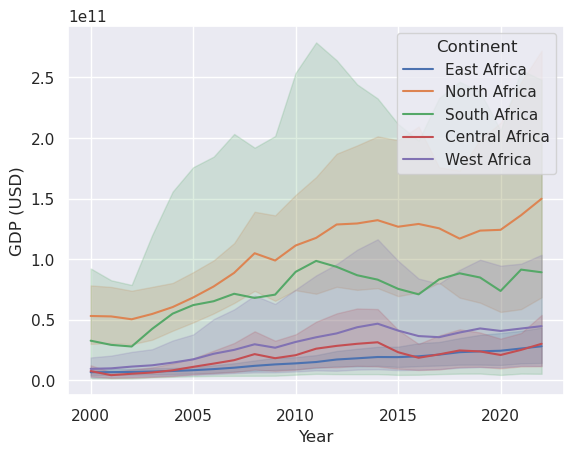

In [12]:
sns.lineplot(data = data, x = 'Year', y = 'GDP (USD)', hue = 'Continent')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/3647082499.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


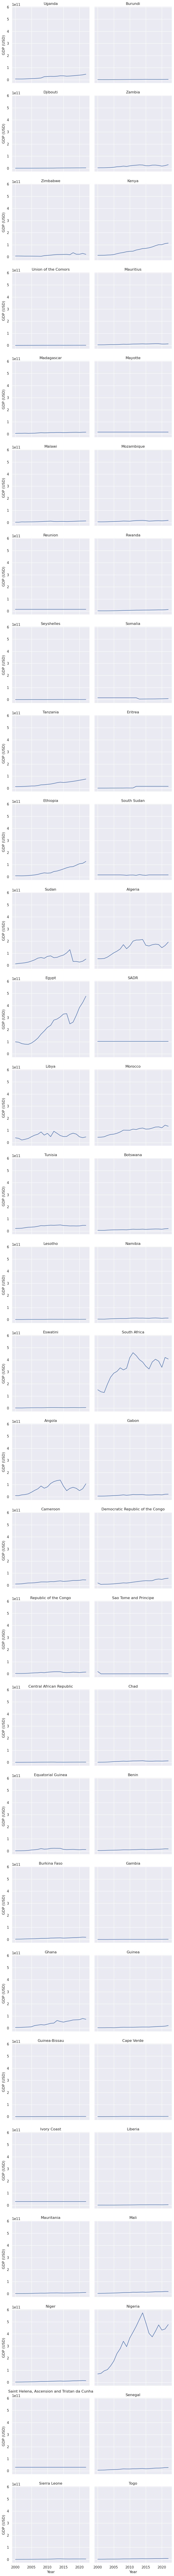

In [13]:
g = sns.FacetGrid(data, col="Country", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, x="Year", y="GDP (USD)")
g.set_axis_labels("Year", "GDP (USD)")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()